## Image Classification using Convolutional Neural Networks (CNNs)

#### Objective:

The objective of this exercise is to provide students with hands-on experience in building, training, and evaluating a Convolutional Neural Network (CNN) for image classification using the Caltech101 dataset. Students will learn the principles of CNNs, including convolutional layers, pooling layers, and fully connected layers, as well as techniques for data augmentation and model evaluation.

#### Dataset:

Caltech101: This dataset contains 101 categories of objects, with approximately 40 to 800 images per category. The images are of various sizes, but most are medium resolution.

In [1]:
import tensorflow as tf
from keras import layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import itertools

### Data preprocessing:

`tf.image.resize(image, (224, 224))`: Resizes each image to 224x224 pixels. This is a common size for CNN inputs, such as those used in models like VGG and ResNet.

`tf.cast(image, tf.float32) / 255.0`: Converts the pixel values to float32 and normalizes them to the range [0, 1]. This normalization helps improve the convergence of neural networks during training.

In [3]:
(train_dataset, test_dataset), dataset_info = tfds.load(
    name='caltech101:3.0.2',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True,
)

num_classes = dataset_info.features['label'].num_classes

def preprocess_image(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_dataset = train_dataset.map(preprocess_image).shuffle(1000).batch(32)
test_dataset = test_dataset.map(preprocess_image).batch(32)

### Model definition:

`models.Sequential`: This specifies a linear stack of layers. The layers are added sequentially, meaning each layer has exactly one input tensor and one output tensor.

`layers.Conv2D(32, (3, 3), activation='relu')`: This layer creates 32 filters, each of size 3x3, which convolve over the input image. The activation function used is ReLU (Rectified Linear Unit), which introduces non-linearity into the model.
input_shape=(224, 224, 3): Specifies the input shape, where 224x224 is the image size and 3 is the number of color channels (RGB).

`layers.MaxPooling2D((2, 2))`: This layer performs max pooling with a 2x2 filter, reducing the spatial dimensions (height and width) by half. It helps in reducing the computational complexity and the risk of overfitting by down-sampling the input.

`layers.Conv2D(64, (3, 3), activation='relu')`: This layer increases the number of filters to 64, with each filter of size 3x3. This deeper layer can learn more complex features.

`layers.Flatten()`: This layer flattens the 2D outputs from the previous layer into a 1D vector, preparing the data for the fully connected layers.

`layers.Dense(128, activation='relu')`: A dense layer with 128 units and ReLU activation. Dense layers are fully connected, meaning each neuron in the layer receives input from all neurons in the previous layer. This layer helps in learning complex 

`layers.Dense(num_classes, activation='softmax')`: The output layer with a number of units equal to the number of classes (num_classes). The softmax activation function is used, which outputs a probability distribution over the classes, making it suitable for multi-class classification.

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

### Model compilation:

`optimizer='adam'`: The Adam (Adaptive Moment Estimation) optimizer is used to adjust the model's weights during training. Adam is a popular choice because it combines the advantages of two other extensions of stochastic gradient descent: Adaptive Gradient Algorithm (AdaGrad) and Root Mean Square Propagation (RMSProp). It adapts the learning rate for each parameter, making the optimization process more efficient and potentially leading to faster convergence.

`loss='sparse_categorical_crossentropy'`: This loss function is used for multi-class classification problems where the target labels are integers. In this case, the labels are provided as integers (e.g., 0, 1, 2, ...) rather than one-hot encoded vectors. The sparse categorical crossentropy computes the cross-entropy loss between the true labels and the predicted probabilities, which is suitable for multi-class classification tasks.

`metrics=['accuracy']`: This specifies that accuracy will be tracked during training and evaluation. Accuracy is a common metric for classification tasks, representing the proportion of correctly predicted samples.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
77/77 [==============================] - 18s 118ms/step - loss: 5.3020 - accuracy: 0.0384 - val_loss: 4.4576 - val_accuracy: 0.0588
Epoch 2/10
77/77 [==============================] - 5s 56ms/step - loss: 3.7249 - accuracy: 0.2120 - val_loss: 4.1225 - val_accuracy: 0.1667
Epoch 3/10
77/77 [==============================] - 5s 57ms/step - loss: 1.3983 - accuracy: 0.6944 - val_loss: 4.8281 - val_accuracy: 0.1961
Epoch 4/10
77/77 [==============================] - 5s 55ms/step - loss: 0.2300 - accuracy: 0.9538 - val_loss: 5.6745 - val_accuracy: 0.2141
Epoch 5/10
77/77 [==============================] - 5s 56ms/step - loss: 0.0483 - accuracy: 0.9914 - val_loss: 5.8276 - val_accuracy: 0.2304
Epoch 6/10
77/77 [==============================] - 5s 60ms/step - loss: 0.0190 - accuracy: 0.9967 - val_loss: 6.6201 - val_accuracy: 0.2304
Epoch 7/10
77/77 [==============================] - 5s 56ms/step - loss: 0.0353 - accuracy: 0.9935 - val_loss: 6.2441 - val_accuracy: 0.1944
Epoch 8/10


In [ ]:
num_params = model.count_params()
print(f"Number of trainable parameters in the model: {num_params}")

Number of trainable parameters in the model: 23920550


In [ ]:
loss, accuracy = model.evaluate(test_dataset)
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

20/20 [==============================] - 0s 21ms/step - loss: 6.9841 - accuracy: 0.1912
Accuracy on the test set: 19.12%


1/1 [==============================] - 0s 134ms/step


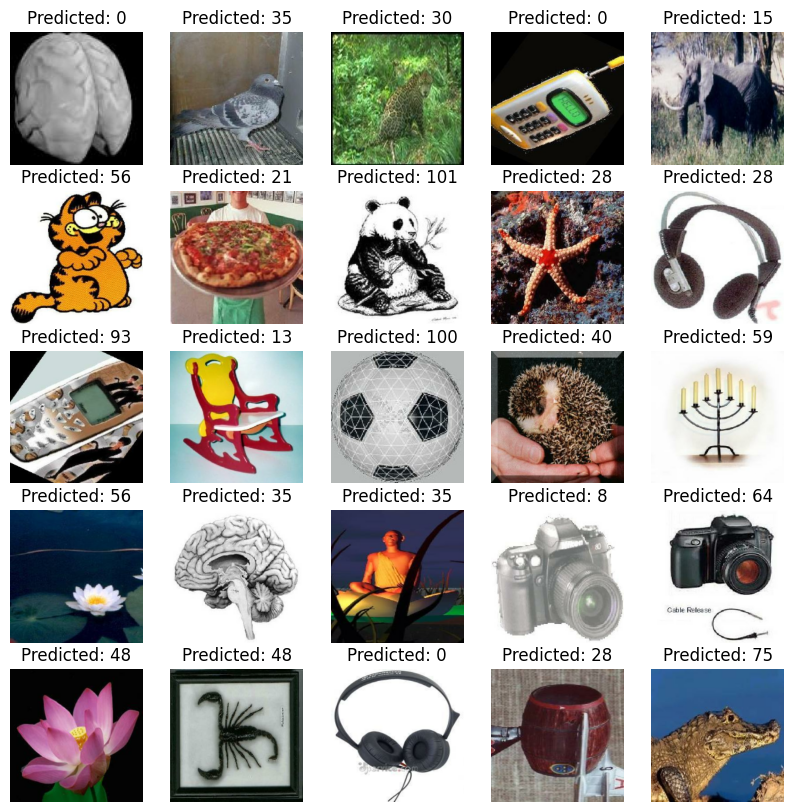

In [ ]:
misclassified_images = []
misclassified_labels = []
for image, label in test_dataset:
    predictions = model.predict(image)
    predicted_label = np.argmax(predictions, axis=1)
    misclassified_idx = np.where(predicted_label != label.numpy())[0]
    for idx in misclassified_idx:
        misclassified_images.append(image[idx])
        misclassified_labels.append(predicted_label[idx])

plt.figure(figsize=(10, 10))
for i in range(min(25, len(misclassified_images))):
    plt.subplot(5, 5, i+1)
    plt.imshow(misclassified_images[i])
    plt.title(f"Predicted: {misclassified_labels[i]}")
    plt.axis('off')
plt.show()

1/1 [==============================] - 0s 121ms/step
Number of feature maps in each layer: 7


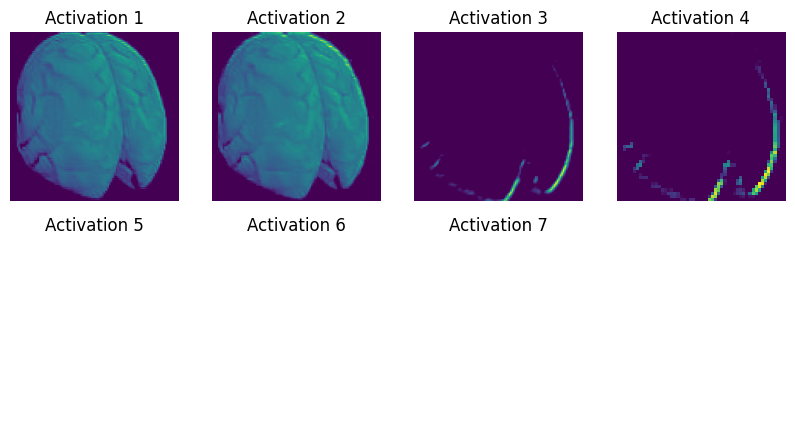

In [ ]:
sample_image, _ = next(itertools.islice(iter(test_dataset), 0, 1))
sample_image = sample_image[:1]

activation_model = models.Model(inputs=model.input,
                                outputs=[layer.output for layer in model.layers])
# activation_model = models.Model(inputs=model.input, outputs=model.layers[4].output)
activations = activation_model.predict(sample_image)

print(f"Number of feature maps in each layer: {len(activations)}")

plt.figure(figsize=(10, 5))
for i, activation in enumerate(activations):
    plt.subplot(2, 4, i+1)
    try:
        plt.imshow(activation[0, :, :, 0], cmap='viridis')
    except:
        pass
    plt.title(f"Activation {i+1}")
    plt.axis('off')
plt.show()

In [ ]:
sample_image, _ = next(itertools.islice(iter(test_dataset), 0, 1))

In [ ]:
s = sample_image[:1]